<a href="https://colab.research.google.com/github/ah20776/CE888---Assignment/blob/main/Ethnicity%20in%20UK%20Policing/Assignment2/Assignment2_Ajay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install 'aif360[all]'

In [2]:
#Importing dataset saved in github
!git clone https://github.com/ah20776/CE888---Assignment.git

fatal: destination path 'CE888---Assignment' already exists and is not an empty directory.


In [3]:
!pip install common-utils

In [4]:
import sys
sys.path.append("../")

%matplotlib inline
# data manipulation libraries
import pandas as pd
import numpy as np

from tqdm import tqdm
from warnings import warn

from time import time

# Graphs libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly import tools

# Libraries to study
from aif360.metrics.utils import compute_boolean_conditioning_vector
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import LFR, Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, EqOddsPostprocessing, RejectOptionClassification
from aif360.algorithms.postprocessing.reject_option_classification\
        import RejectOptionClassification

# ML libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, MaxAbsScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Design libraries
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interactive, FloatSlider

In [5]:
# Metrics function
from collections import OrderedDict
from aif360.metrics import ClassificationMetric

def compute_metrics(dataset_true, dataset_pred, 
                    unprivileged_groups, privileged_groups,
                    disp = True):
    """ Compute the key metrics """
    classified_metric_pred = ClassificationMetric(dataset_true,
                                                 dataset_pred, 
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metrics = OrderedDict()
    metrics["Balanced accuracy"] = 0.5*(classified_metric_pred.true_positive_rate()+
                                             classified_metric_pred.true_negative_rate())
    metrics["Statistical parity difference"] = classified_metric_pred.statistical_parity_difference()
    metrics["Disparate impact"] = classified_metric_pred.disparate_impact()
    metrics["Average odds difference"] = classified_metric_pred.average_odds_difference()
    metrics["Equal opportunity difference"] = classified_metric_pred.equal_opportunity_difference()
    metrics["Theil index"] = classified_metric_pred.theil_index()
    
    if disp:
        for k in metrics:
            print("%s = %.4f" % (k, metrics[k]))
    
    return metrics

In [6]:
#Importing dataset saved in github
!git clone https://github.com/ah20776/CE888---Assignment.git

fatal: destination path 'CE888---Assignment' already exists and is not an empty directory.


In [7]:
#LONDON

london18_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-01-city-of-london-stop-and-search.csv')
london18_1["Month"] = "January"
london18_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-02-city-of-london-stop-and-search.csv')
london18_2["Month"] = "February"
london18_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-03-city-of-london-stop-and-search.csv')
london18_3["Month"] = "March"
london18_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-04-city-of-london-stop-and-search.csv')
london18_4["Month"] = "April"
london18_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-05-city-of-london-stop-and-search.csv')
london18_5["Month"] = "May"
london18_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-06-city-of-london-stop-and-search.csv')
london18_6["Month"] = "June"
london18_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-07-city-of-london-stop-and-search.csv')
london18_7["Month"] = "July"
london18_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-08-city-of-london-stop-and-search.csv')
london18_8["Month"] = "August"
london18_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-09-city-of-london-stop-and-search.csv')
london18_9["Month"] = "September"
london18_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-10-city-of-london-stop-and-search.csv')
london18_10["Month"] = "October"
london18_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-11-city-of-london-stop-and-search.csv')
london18_11["Month"] = "November"
london18_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2018-12-city-of-london-stop-and-search.csv')
london18_12["Month"] = "December"
london19_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-01-city-of-london-stop-and-search.csv')
london19_1["Month"] = "January"
london19_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-02-city-of-london-stop-and-search.csv')
london19_2["Month"] = "February"
london19_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-03-city-of-london-stop-and-search.csv')
london19_3["Month"] = "March"
london19_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-04-city-of-london-stop-and-search.csv')
london19_4["Month"] = "April"
london19_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-05-city-of-london-stop-and-search.csv')
london19_5["Month"] = "May"
london19_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-06-city-of-london-stop-and-search.csv')
london19_6["Month"] = "June"
london19_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-07-city-of-london-stop-and-search.csv')
london19_7["Month"] = "July"
london19_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-08-city-of-london-stop-and-search.csv')
london19_8["Month"] = "August"
london19_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-09-city-of-london-stop-and-search.csv')
london19_9["Month"] = "September"
london19_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-10-city-of-london-stop-and-search.csv')
london19_10["Month"] = "October"
london19_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-11-city-of-london-stop-and-search.csv')
london19_11["Month"] = "November"
london19_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2019-12-city-of-london-stop-and-search.csv')
london19_12["Month"] = "December"
london20_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-01-city-of-london-stop-and-search.csv')
london20_1["Month"] = "January"
london20_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-02-city-of-london-stop-and-search.csv')
london20_2["Month"] = "February"
london20_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-03-city-of-london-stop-and-search.csv')
london20_3["Month"] = "March"
london20_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-04-city-of-london-stop-and-search.csv')
london20_4["Month"] = "April"
london20_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-05-city-of-london-stop-and-search.csv')
london20_5["Month"] = "May"
london20_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-06-city-of-london-stop-and-search.csv')
london20_6["Month"] = "June"
london20_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-07-city-of-london-stop-and-search.csv')
london20_7["Month"] = "July"
london20_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-08-city-of-london-stop-and-search.csv')
london20_8["Month"] = "August"
london20_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-09-city-of-london-stop-and-search.csv')
london20_9["Month"] = "September"
london20_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-10-city-of-london-stop-and-search.csv')
london20_10["Month"] = "October"
london20_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-11-city-of-london-stop-and-search.csv')
london20_11["Month"] = "November"
london20_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/London 2018-20/2020-12-city-of-london-stop-and-search.csv')
london20_12["Month"] = "December"
london18 = pd.concat([london18_1,london18_2,london18_3,london18_4,london18_5,london18_6,london18_7,london18_8,london18_9,london18_10,london18_11,london18_12])
london18["Year"] = 2018
london19 = pd.concat([london19_1,london19_2,london19_3,london19_4,london19_5,london19_6,london19_7,london19_8,london19_9,london19_10,london19_11,london19_12])
london19["Year"] = 2019
london20 = pd.concat([london20_1,london20_2,london20_3,london20_4,london20_5,london20_6,london20_7,london20_8,london20_9,london20_10,london20_11,london20_12])
london20["Year"] = 2020
london = pd.concat([london18,london19,london20])
london["City"] = "London"
london= pd.DataFrame(london)
london.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Month,Year,City
0,Person search,2018-01-01T00:55:00+00:00,NaN,NaN,51.515142,-0.097645,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,False,January,2018,London
1,Person search,2018-01-01T00:58:00+00:00,NaN,NaN,51.515142,-0.097645,Male,over 34,Other ethnic group - Not stated,Other,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Nothing found - no further action,False,False,January,2018,London
2,Person and Vehicle search,2018-01-01T01:25:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Black/African/Caribbean/Black British - African,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,True,False,January,2018,London
3,Person and Vehicle search,2018-01-01T01:25:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Black/African/Caribbean/Black British - African,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False,January,2018,London
4,Person and Vehicle search,2018-01-01T01:30:00+00:00,NaN,NaN,51.512650,-0.101452,Male,18-24,Black/African/Caribbean/Black British - African,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False,January,2018,London


In [8]:
london.columns = london.columns.str.lower().str.replace(' ', '_')
london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6977 entries, 0 to 222
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   type                                      6977 non-null   object 
 1   date                                      6977 non-null   object 
 2   part_of_a_policing_operation              0 non-null      float64
 3   policing_operation                        0 non-null      float64
 4   latitude                                  4936 non-null   float64
 5   longitude                                 4936 non-null   float64
 6   gender                                    6920 non-null   object 
 7   age_range                                 6509 non-null   object 
 8   self-defined_ethnicity                    6570 non-null   object 
 9   officer-defined_ethnicity                 6545 non-null   object 
 10  legislation                          

In [9]:
london.shape

(6977, 18)

In [10]:
#Getting subset
sort = london[['type','date','gender','age_range','officer-defined_ethnicity','object_of_search','outcome']]
data = sort.dropna()
data = data.reset_index(drop=True)
data.describe()

,type,date,gender,age_range,officer-defined_ethnicity,object_of_search,outcome
count,6318,6318,6318,6318,6318,6318,6318
unique,2,6018,3,5,4,11,13
top,Person search,2018-03-18T22:40:00+00:00,Male,18-24,White,Controlled drugs,A no further action disposal
freq,4536,4,5700,2354,3266,3541,4194


In [11]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date
data.rename({'officer-defined_ethnicity':'ethnicity'}, axis=1, inplace=True)
data.head()

,type,date,gender,age_range,ethnicity,object_of_search,outcome
0,Person search,2018-01-01,Male,25-34,White,Stolen goods,Nothing found - no further action
1,Person search,2018-01-01,Male,over 34,Other,Evidence of offences under the Act,Nothing found - no further action
2,Person and Vehicle search,2018-01-01,Male,18-24,Black,Controlled drugs,Nothing found - no further action
3,Person and Vehicle search,2018-01-01,Male,25-34,Black,Controlled drugs,Offender given drugs possession warning
4,Person and Vehicle search,2018-01-01,Male,18-24,Black,Controlled drugs,Offender given drugs possession warning


In [12]:
data['outcome'].value_counts()

A no further action disposal               4194
Arrest                                     1331
Khat or Cannabis warning                    354
Nothing found - no further action           198
Suspect arrested                             61
Community resolution                         60
Penalty Notice for Disorder                  36
Offender given drugs possession warning      29
Summons / charged by post                    25
Caution (simple or conditional)              17
Local resolution                             10
Suspect summonsed to court                    2
Offender given penalty notice                 1
Name: outcome, dtype: int64

In [13]:
data['ethnicity'].value_counts()

White    3266
Black    1439
Asian    1305
Other     308
Name: ethnicity, dtype: int64

In [14]:
data['gender'].value_counts()

Male      5700
Female     616
Other        2
Name: gender, dtype: int64

In [15]:
data['age_range'].value_counts()

18-24       2354
25-34       2119
over 34     1385
10-17        457
under 10       3
Name: age_range, dtype: int64

In [16]:
data['object_of_search'].value_counts()

Controlled drugs                       3541
Article for use in theft               1162
Stolen goods                            898
Offensive weapons                       424
Evidence of offences under the Act      149
Firearms                                 53
Articles for use in criminal damage      46
Anything to threaten or harm anyone      28
Fireworks                                11
Psychoactive substances                   5
Crossbows                                 1
Name: object_of_search, dtype: int64

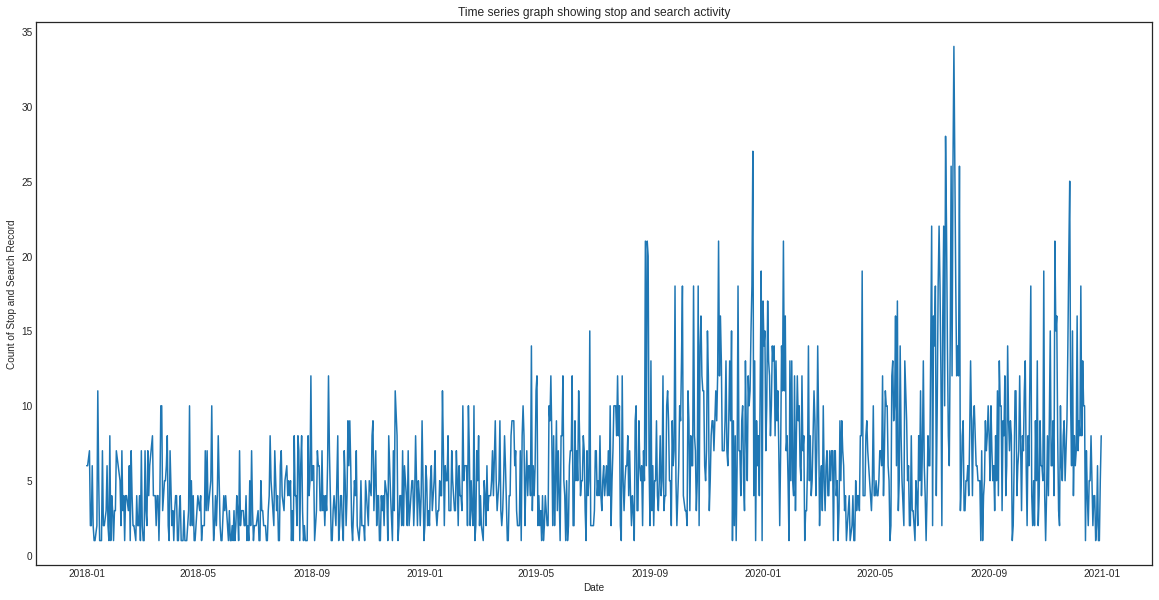

In [17]:
count_by_date = data.groupby('date').size()

plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Count of Stop and Search Record')
plt.title('Time series graph showing stop and search activity')
plt.plot(count_by_date);

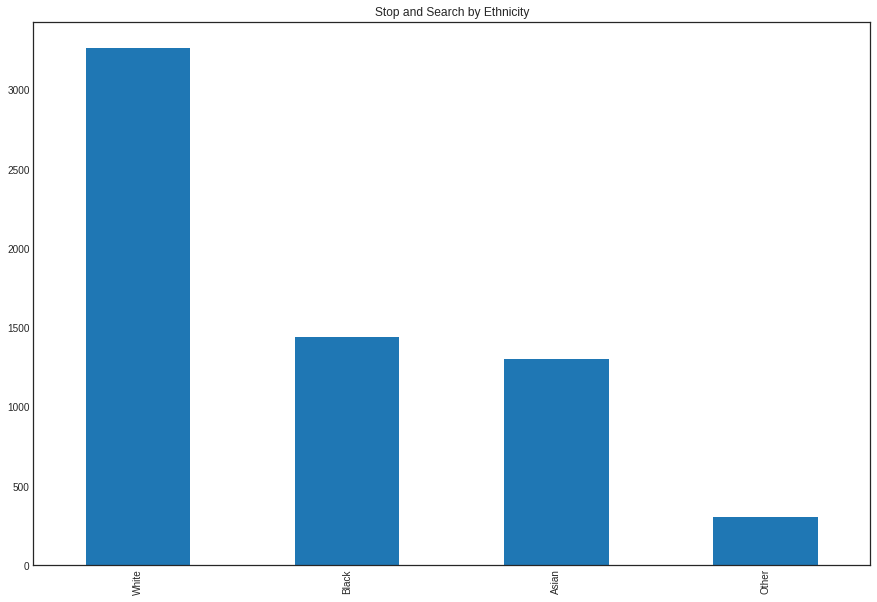

In [18]:
data['ethnicity'].value_counts().plot.bar(title='Stop and Search by Ethnicity',figsize=(15,10));

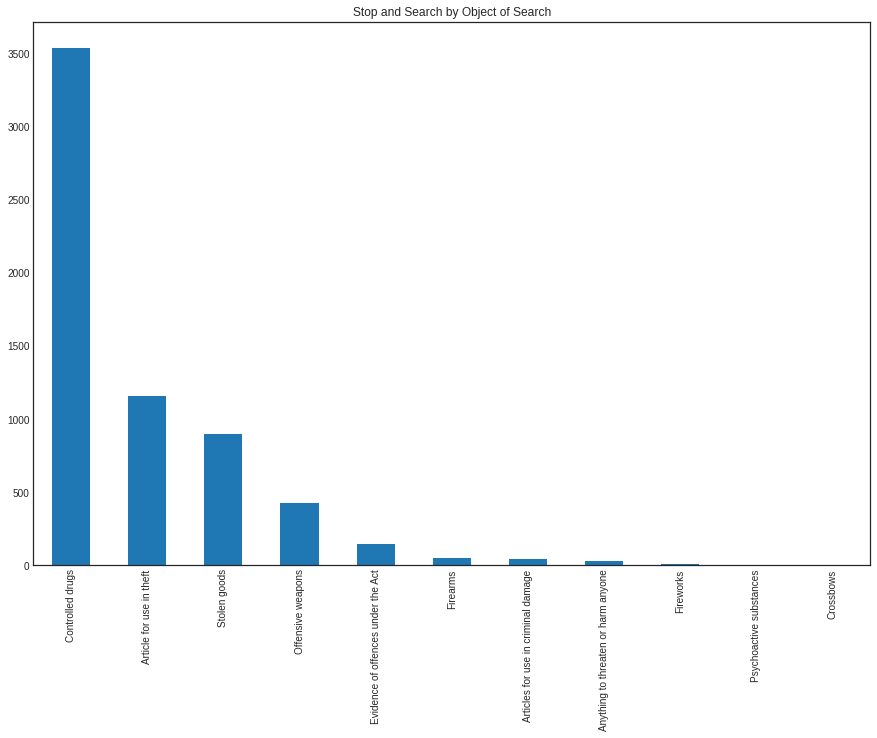

In [19]:
data['object_of_search'].value_counts().plot.bar(title='Stop and Search by Object of Search',figsize=(15,10));

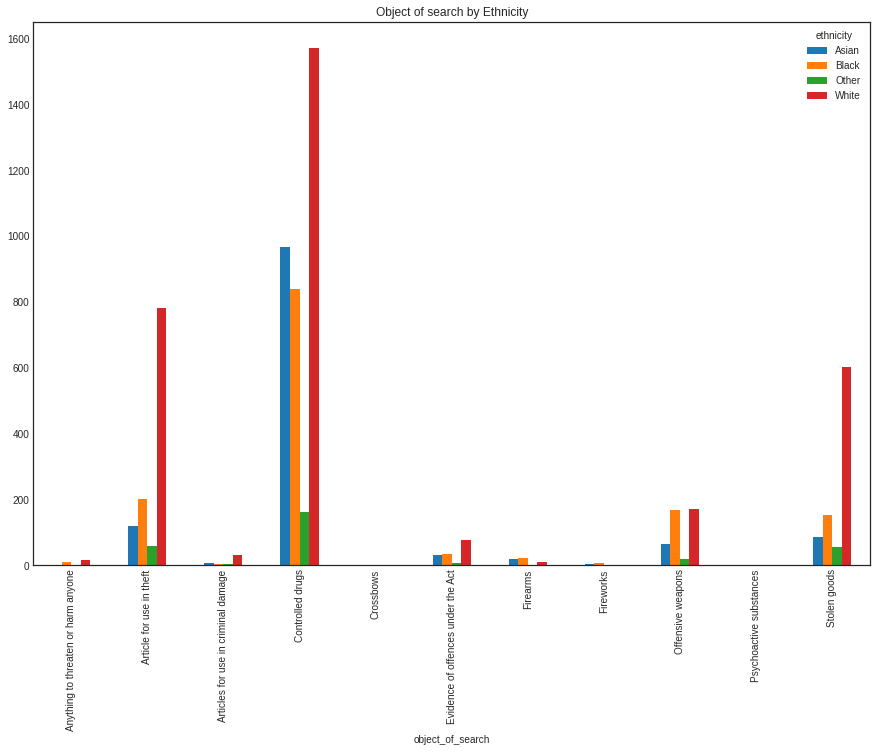

In [20]:
data.groupby('ethnicity')['object_of_search'].value_counts().unstack(0).plot.bar(title='Object of search by Ethnicity', figsize=(15,10));

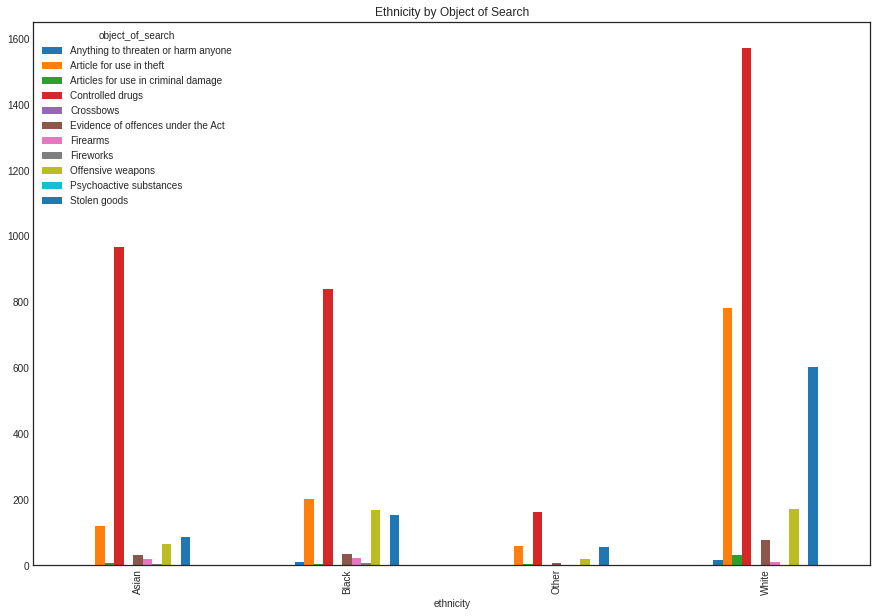

In [21]:
data.groupby('object_of_search')['ethnicity'].value_counts().unstack(0).plot.bar(title='Ethnicity by Object of Search', figsize=(15,10));

In [22]:
counts = data['object_of_search'].value_counts()
counts
counts[counts > 1000]

Controlled drugs            3541
Article for use in theft    1162
Name: object_of_search, dtype: int64

In [23]:
drugs = data.object_of_search == 'Controlled drugs'
weapons = data.object_of_search == 'Offensive weapons'

In [24]:
drugs_p_weapons = data.object_of_search[weapons].count() + data.object_of_search[weapons].count()

In [25]:
drugs_prc = data.object_of_search[drugs].count() / drugs_p_weapons
weapons_prc = data.object_of_search[weapons].count() / drugs_p_weapons

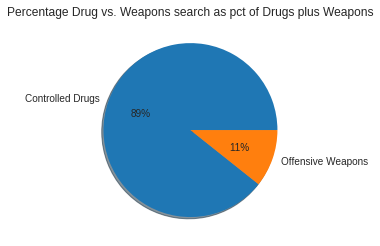

In [26]:
# this will plot a pie chart for us
labels = 'Controlled Drugs', 'Offensive Weapons'
fracs = [drugs_prc, weapons_prc]
explode = (0,0)
plt.axis("equal")
plt.title('Percentage Drug vs. Weapons search as pct of Drugs plus Weapons')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

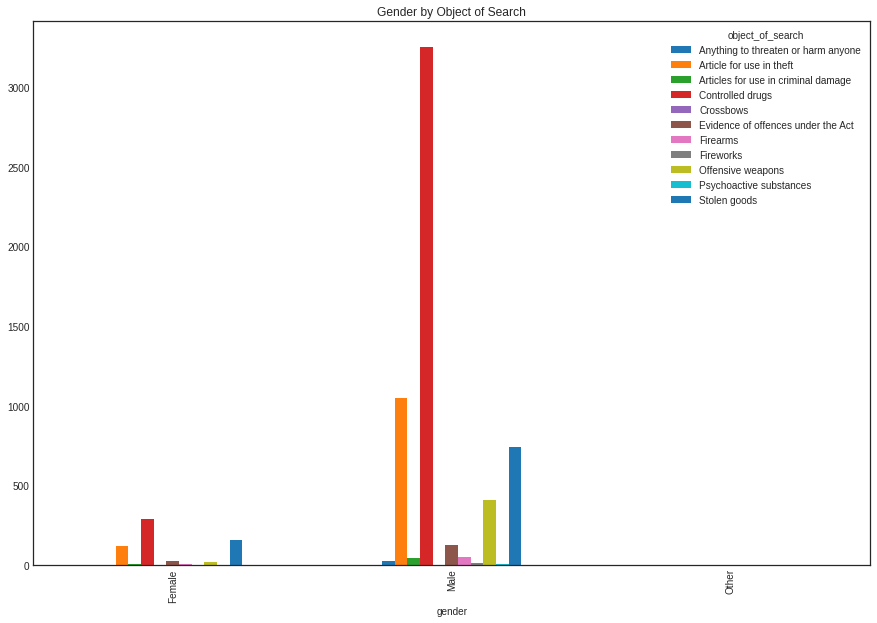

In [27]:
data.groupby('object_of_search')['gender'].value_counts().unstack(0).plot.bar(title='Gender by Object of Search', figsize=(15,10));

In [28]:
gender_male = data.gender == 'Male'
gender_female = data.gender == 'Female'

In [29]:
gender_male_prc = data.gender[gender_male].count() / len(data)
gender_female_prc = data.gender[gender_female].count() / len(data)

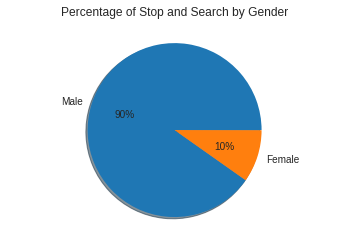

In [30]:
labels = 'Male', 'Female'
fracs = [gender_male_prc, gender_female_prc]
explode = (0.0,0)
plt.axis("equal")
plt.title('Percentage of Stop and Search by Gender')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

In [31]:
age_u10 = data.age_range == 'under 10'
age_10 = data.age_range == '10-17'
age_18 = data.age_range == '18-24'
age_25 = data.age_range == '25-34'
age_34 = data.age_range == 'over 34'

In [32]:
age_u10_prc = data.age_range[age_u10].count() / len(data)
age_10_prc = data.age_range[age_10].count() / len(data)
age_18_prc = data.age_range[age_18].count() / len(data)
age_25_prc = data.age_range[age_25].count() / len(data)
age_34_prc = data.age_range[age_34].count() / len(data)

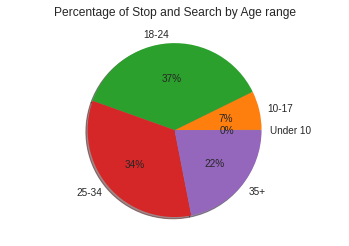

In [33]:
labels = 'Under 10', '10-17', '18-24', '25-34', '35+'
fracs = [age_u10_prc, age_10_prc, age_18_prc, age_25_prc, age_34_prc]
explode = (0,0,0,0,0)
plt.axis("equal")
plt.title('Percentage of Stop and Search by Age range')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

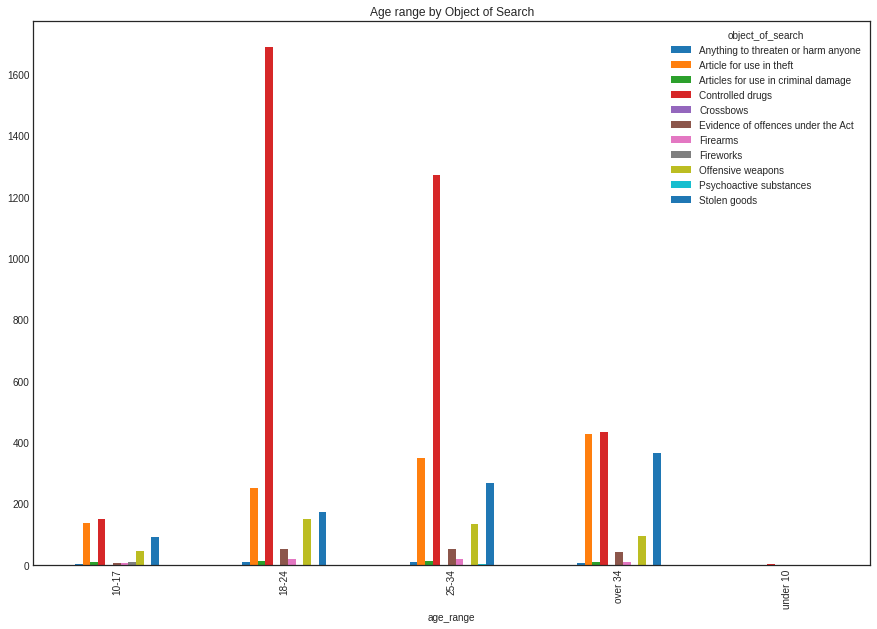

In [34]:
data.groupby('object_of_search')['age_range'].value_counts().unstack(0).plot.bar(title='Age range by Object of Search', figsize=(15,10));

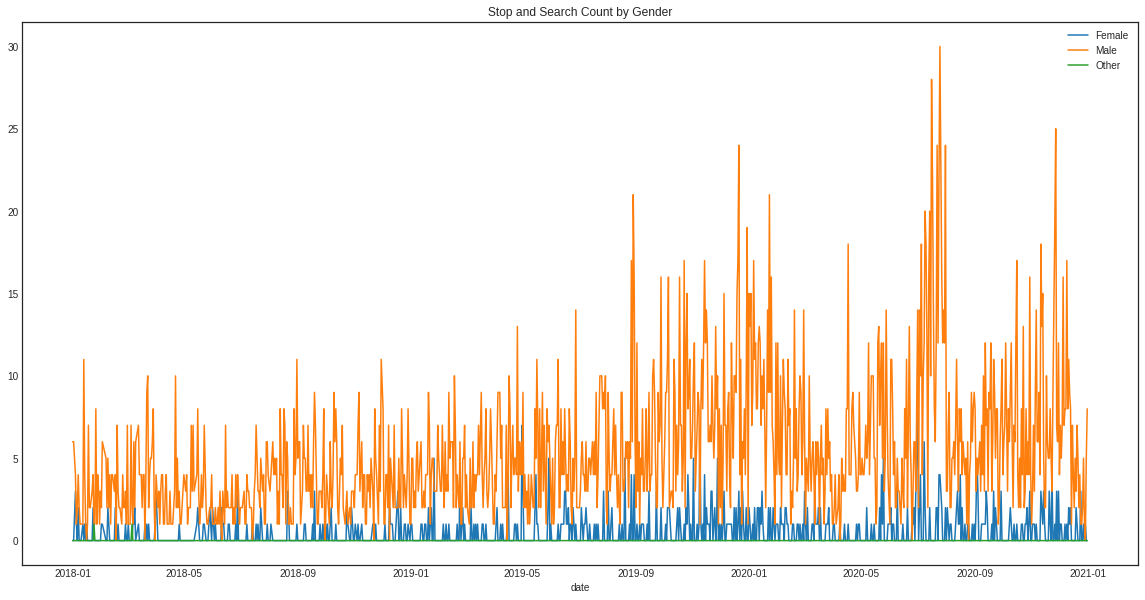

In [35]:
gender_count = data.groupby('date')
gender_count = gender_count.gender.apply(pd.value_counts).unstack(-1).fillna(0)


gender_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Gender');

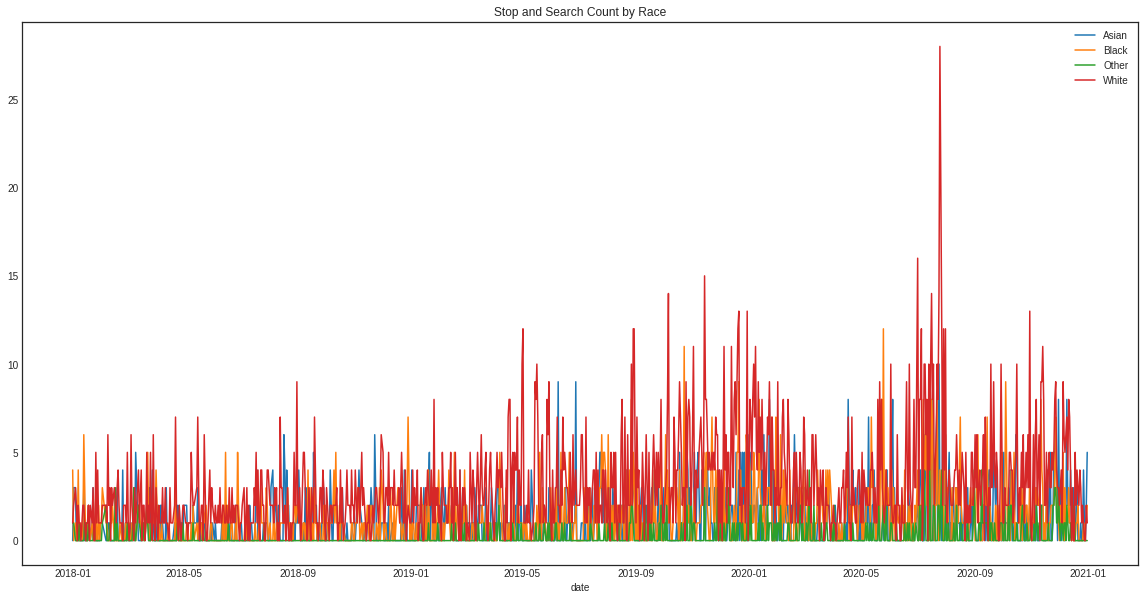

In [36]:
race_count = data.groupby('date')
race_count = race_count.ethnicity.apply(pd.value_counts).unstack(-1).fillna(0)

race_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Race');

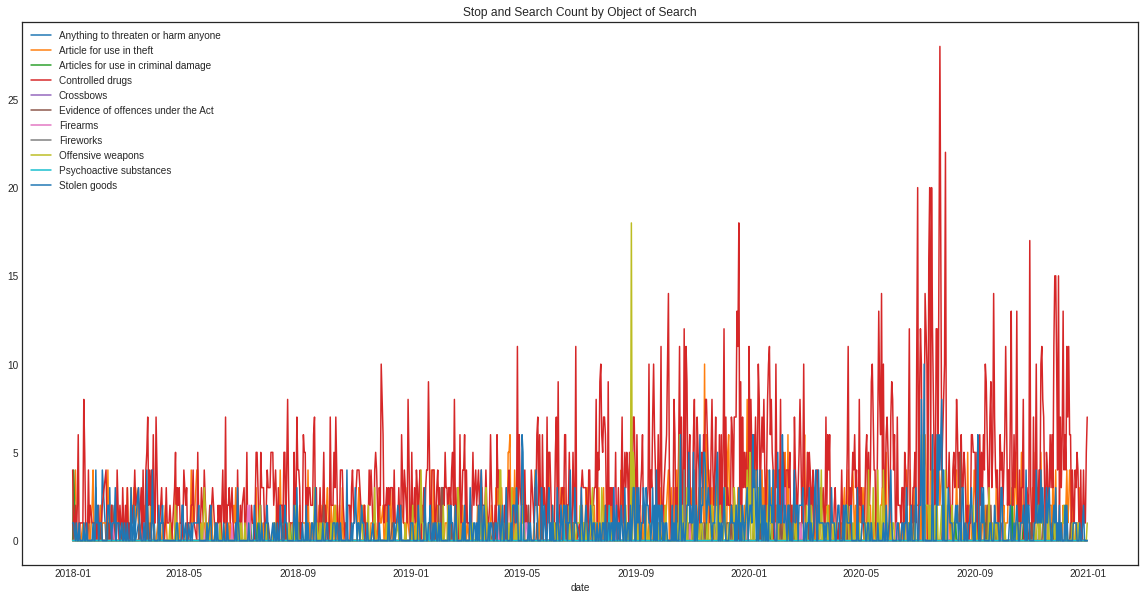

In [37]:
object_count = data.groupby('date')
object_count = object_count.object_of_search.apply(pd.value_counts).unstack(-1).fillna(0)

object_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Object of Search');

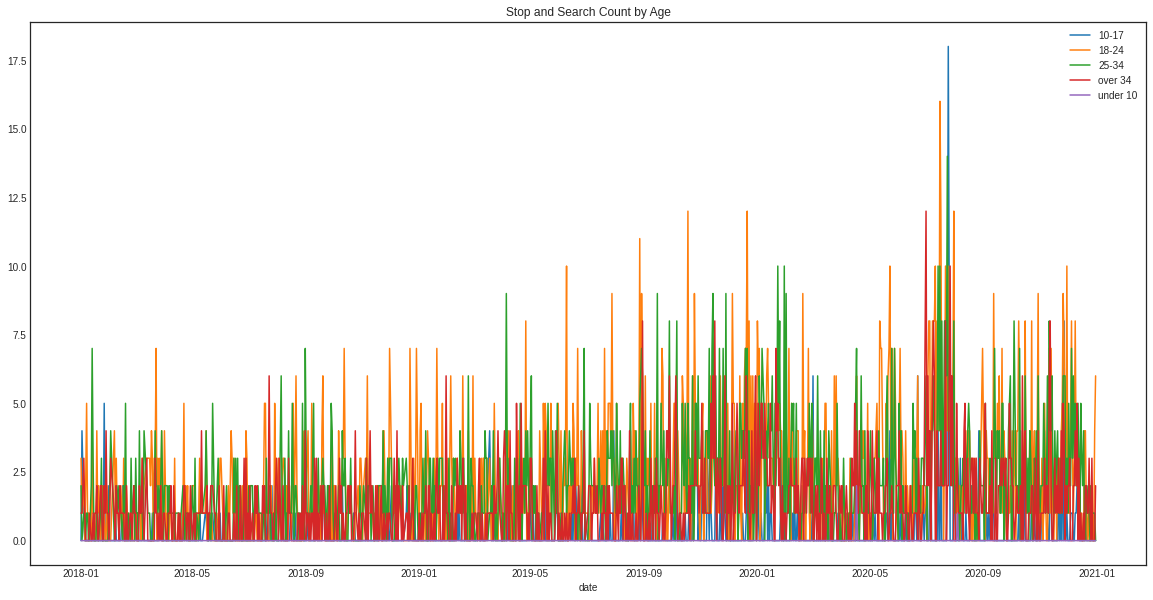

In [38]:
age_count = data.groupby('date')
age_count = age_count.age_range.apply(pd.value_counts).unstack(-1).fillna(0)
age_count.plot(kind='line', figsize=(20,10), title='Stop and Search Count by Age');

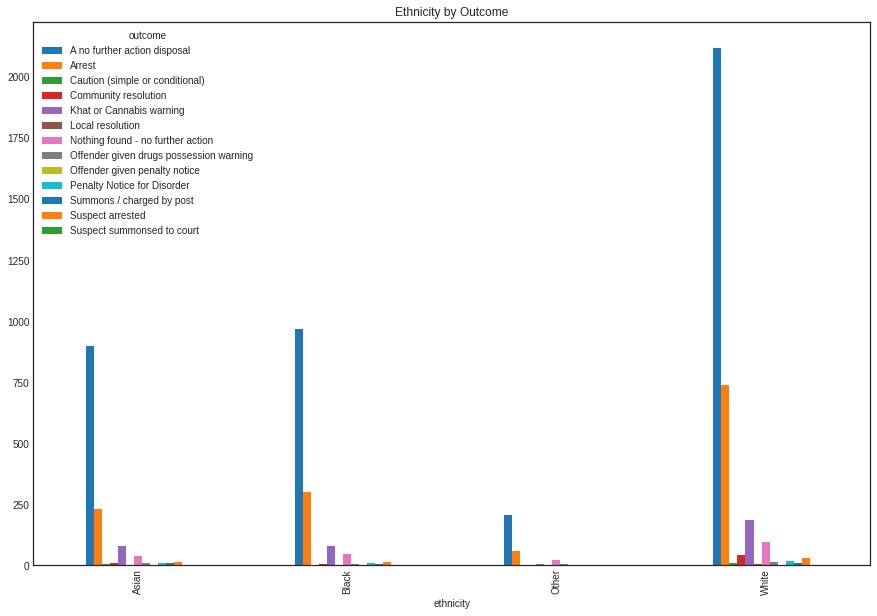

In [39]:
data.groupby('outcome')['ethnicity'].value_counts().unstack(0).plot.bar(title='Ethnicity by Outcome', figsize=(15,10));

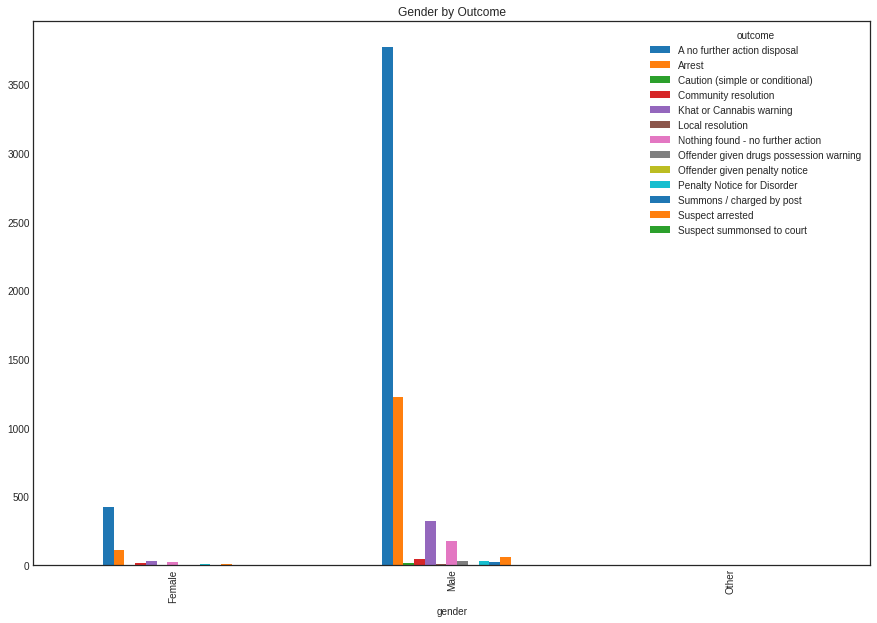

In [40]:
data.groupby('outcome')['gender'].value_counts().unstack(0).plot.bar(title='Gender by Outcome', figsize=(15,10));

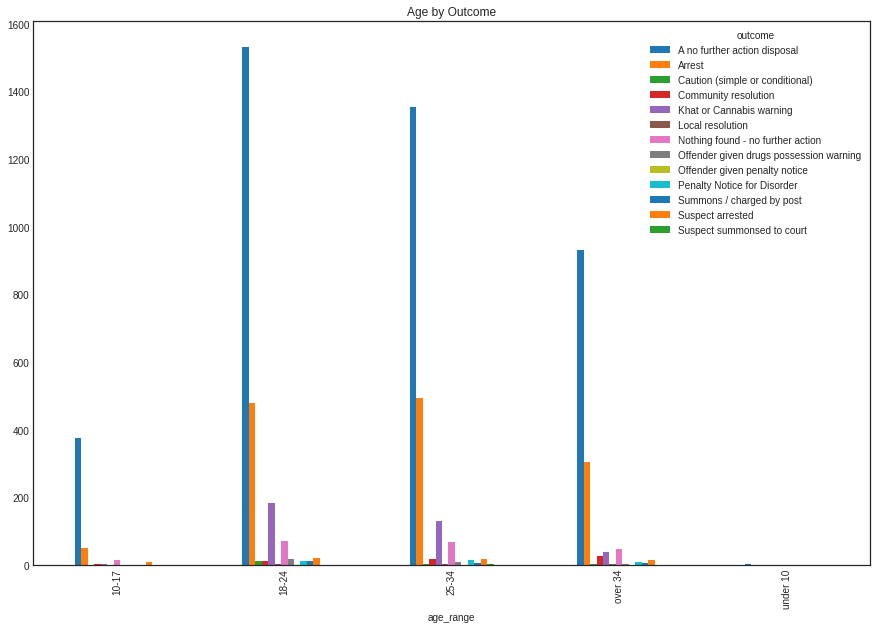

In [41]:
data.groupby('outcome')['age_range'].value_counts().unstack(0).plot.bar(title='Age by Outcome', figsize=(15,10));

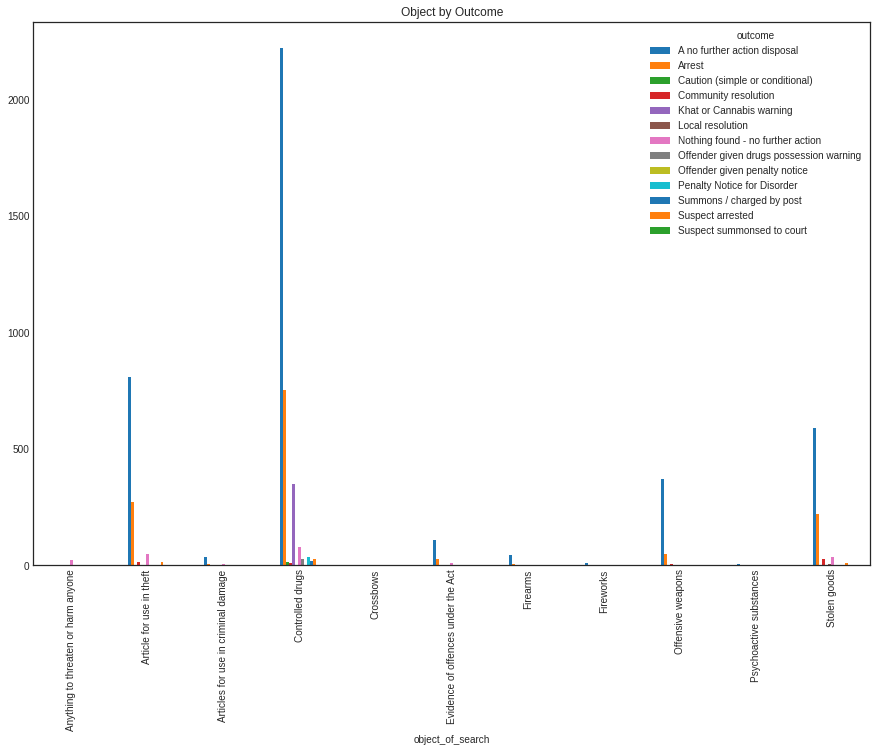

In [42]:
data.groupby('outcome')['object_of_search'].value_counts().unstack(0).plot.bar(title='Object by Outcome', figsize=(15,10));

In [43]:
Y_columns = ['gender','ethnicity','age_range']

cat_columns = []
num_columns = []

for col in data.columns.values:
    if col in Y_columns:
        continue
    elif data[col].dtypes == 'int64':
        num_columns += [col]
    else:
        cat_columns += [col]

print (Y_columns)

['gender', 'ethnicity', 'age_range']


In [44]:
def target_distribution(y_var, data):
    val = data[y_var]

    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y_var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y_var)
    plt.show()

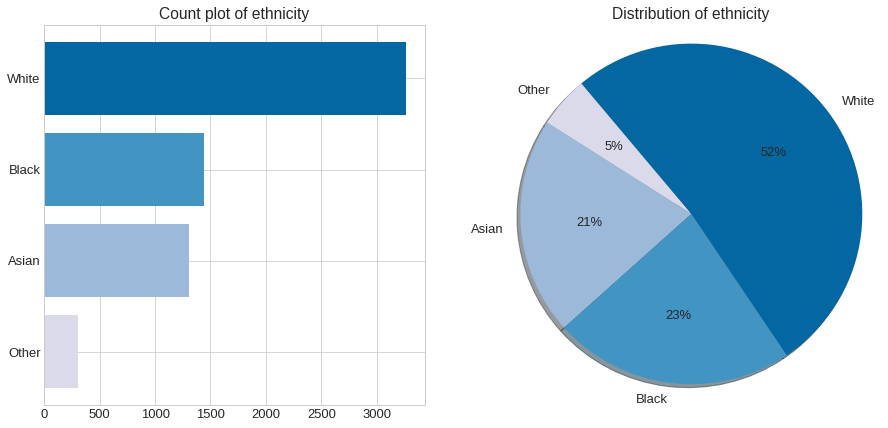

In [45]:
var = 'ethnicity'
target_distribution(y_var=var, data=data)

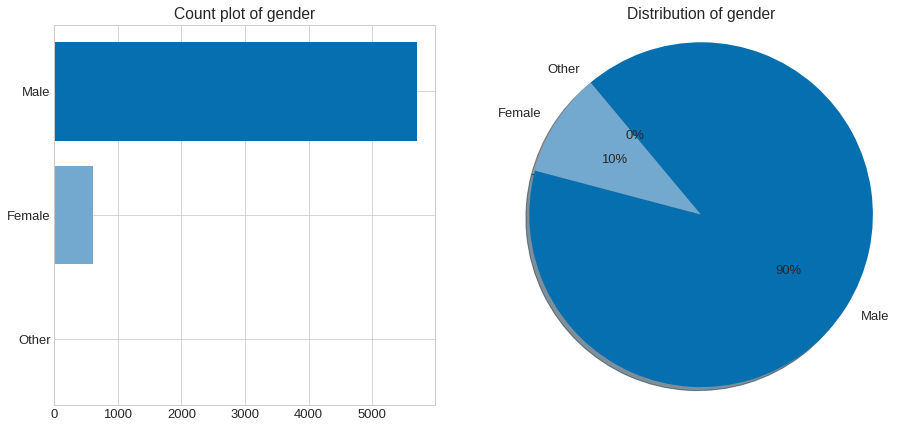

In [46]:
var = 'gender'
target_distribution(y_var=var, data=data)

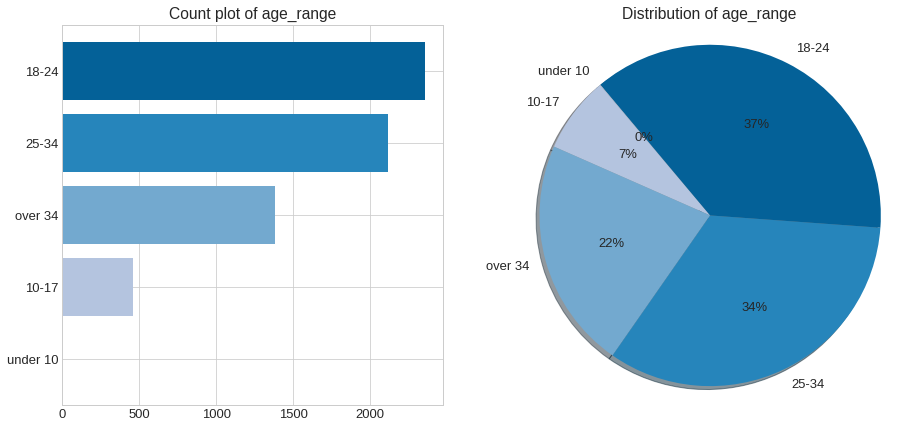

In [47]:
var = 'age_range'
target_distribution(y_var=var, data=data)

In [48]:
data['Frequency'] = 1
freq_target = data[['gender', 'ethnicity', 'age_range', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['gender', 'ethnicity', 'age_range']).count() / len(data)
print(freq_target.sort_values(by='Frequency', ascending=False))

                            Frequency
gender ethnicity age_range           
Male   White     25-34       0.163659
                 18-24       0.140076
                 over 34     0.114910
       Asian     18-24       0.090852
       Black     18-24       0.087369
                 25-34       0.063786
       Asian     25-34       0.062362
       Black     over 34     0.039253
       White     10-17       0.032447
       Asian     over 34     0.031814
Female White     25-34       0.020734
                 18-24       0.020576
                 over 34     0.019310
Male   Black     10-17       0.018677
       Other     18-24       0.017252
                 25-34       0.015670
       Asian     10-17       0.012346
       Other     over 34     0.008705
Female Black     18-24       0.008547
                 25-34       0.006015
       Asian     18-24       0.005698
       White     10-17       0.005065
       Black     over 34     0.002691
Male   Other     10-17       0.002532
Female Other

In [49]:
def plot_histo(data, col, Y_columns):
    df = data.copy()
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    
    for i in range(0,2):
        cnt = []; y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt += [df[df[y_col] == val][col].values]
        bins = df[col].nunique()

        axs[i].hist(cnt, bins=bins, stacked=True)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Histogram of the "+col+" column by "+y_col)

    plt.show()

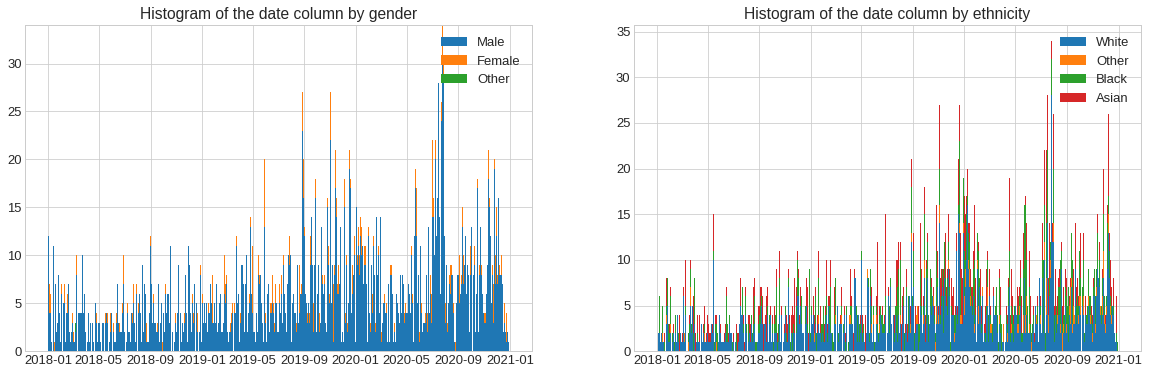

In [50]:
plot_histo(data, col='date',Y_columns=Y_columns)

In [51]:
cat_columns

['type', 'date', 'object_of_search', 'outcome']

In [52]:
categorical_features = cat_columns + ['gender', 'ethnicity', 'age_range']
# categorical_features = categorical_features 
categorical_features_idx = [np.where(data.columns.values == col)[0][0] for col in categorical_features]

del cat_columns

In [53]:
data_encoded = data.copy()

categorical_names = {}
encoders = {}

# Use Label Encoder for categorical columns (including target column)
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])
    
    data_encoded[feature] = le.transform(data_encoded[feature])
    
    categorical_names[feature] = le.classes_
    encoders[feature] = le

In [54]:
numerical_features = [c for c in data.columns.values if c not in categorical_features]

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms
    
data_encoded = data_encoded.astype(float)

del num_columns

In [55]:
data_encoded.head()

,type,date,gender,age_range,ethnicity,object_of_search,outcome
0,1.0,0.0,1.0,2.0,3.0,10.0,6.0
1,1.0,0.0,1.0,3.0,2.0,5.0,6.0
2,0.0,0.0,1.0,1.0,1.0,3.0,6.0
3,0.0,0.0,1.0,2.0,1.0,3.0,7.0
4,0.0,0.0,1.0,1.0,1.0,3.0,7.0


In [56]:
def decode_dataset(data, encoders, numerical_features, categorical_features):
    df = data.copy()
    for feat in df.columns.values:
        if feat in numerical_features:
            df[feat] = encoders[feat].inverse_transform(np.array(df[feat]).reshape(-1, 1))
    for feat in categorical_features:
        df[feat] = encoders[feat].inverse_transform(df[feat].astype(int))
    return df

In [57]:
decode_dataset(data_encoded, encoders=encoders, numerical_features=numerical_features, categorical_features=categorical_features).head()

,type,date,gender,age_range,ethnicity,object_of_search,outcome
0,Person search,2018-01-01,Male,25-34,White,Stolen goods,Nothing found - no further action
1,Person search,2018-01-01,Male,over 34,Other,Evidence of offences under the Act,Nothing found - no further action
2,Person and Vehicle search,2018-01-01,Male,18-24,Black,Controlled drugs,Nothing found - no further action
3,Person and Vehicle search,2018-01-01,Male,25-34,Black,Controlled drugs,Offender given drugs possession warning
4,Person and Vehicle search,2018-01-01,Male,18-24,Black,Controlled drugs,Offender given drugs possession warning


In [58]:
data_perp_outcome = data_encoded.drop(['type','date'], axis=1)

In [59]:
privileged_sex = np.where(categorical_names['gender'] == 'Male')[0]
privileged_race = np.where(categorical_names['ethnicity'] == 'White')[0]

In [60]:
data_orig_outcome = StandardDataset(data_perp_outcome, 
                               label_name='outcome', 
                               favorable_classes=[1], 
                               protected_attribute_names=['gender', 'ethnicity'], 
                               privileged_classes=[privileged_sex, privileged_race])

In [61]:
def meta_data(dataset):
    # print out some labels, names, etc.
    display(Markdown("#### Dataset shape"))
    print(dataset.features.shape)
    display(Markdown("#### Favorable and unfavorable labels"))
    print(dataset.favorable_label, dataset.unfavorable_label)
    display(Markdown("#### Protected attribute names"))
    print(dataset.protected_attribute_names)
    display(Markdown("#### Privileged and unprivileged protected attribute values"))
    print(dataset.privileged_protected_attributes, dataset.unprivileged_protected_attributes)
    display(Markdown("#### Dataset feature names"))
    print(dataset.feature_names)

In [62]:
meta_data(data_orig_outcome)

#### Dataset shape

(6318, 4)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['gender', 'ethnicity']


#### Privileged and unprivileged protected attribute values

[array([1.]), array([3.])] [array([0., 2.]), array([0., 1., 2.])]


#### Dataset feature names

['gender', 'age_range', 'ethnicity', 'object_of_search']


In [63]:
np.random.seed(42)

data_orig_outcome_train, data_orig_outcome_test = data_orig_outcome.split([0.7], shuffle=True)

display(Markdown("#### Train Dataset shape"))
print("Outcome :",data_orig_outcome_train.features.shape)
display(Markdown("#### Test Dataset shape"))
print("Outcome :",data_orig_outcome_test.features.shape)

#### Train Dataset shape

Outcome : (4422, 4)


#### Test Dataset shape

Outcome : (1896, 4)


In [64]:
privileged_groups = [{'ethnicity': 3}]
unprivileged_groups = [{'ethnicity': 1}]

metric_orig_train = BinaryLabelDatasetMetric(data_orig_outcome_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.031739


In [65]:
# Train and save the models
rf_orig_outcome = RandomForestClassifier().fit(data_orig_outcome_train.features, 
                     data_orig_outcome_train.labels.ravel(), 
                     sample_weight=data_orig_outcome_train.instance_weights)

In [66]:
#predict on test set

X_test_outcome = data_orig_outcome_test.features
y_test_outcome = data_orig_outcome_test.labels.ravel()

In [67]:
def get_model_performance(X_test, y_true, y_pred, probs):
    accuracy = accuracy_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc

def plot_model_performance(model, X_test, y_true):
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

    display(Markdown('#### Accuracy of the model :'))
    print(accuracy)
    display(Markdown('#### F1 score of the model :'))
    print(f1)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')

    ax = fig.add_subplot(1, 2, 2)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")

#### Accuracy of the model :

0.7895569620253164


#### F1 score of the model :

0.038554216867469876


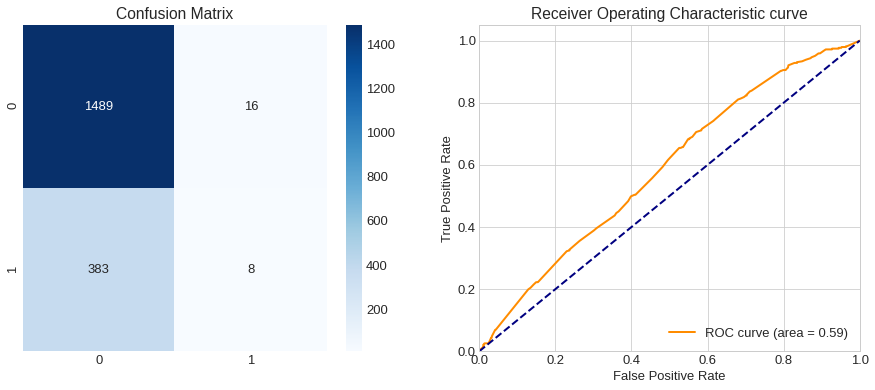

In [68]:
plot_model_performance(rf_orig_outcome, data_orig_outcome_test.features, y_test_outcome)

In [69]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [70]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups = [{'ethnicity': 3}]
        unprivileged_groups = [{'ethnicity': 1}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')


In [71]:
def get_fair_metrics_and_plot(data, model, plot=True, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

### Bias metrics for the Outcome model

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the gender attribute :

With default thresholds, bias against unprivileged group detected in **1** out of 5 metrics

#### For the ethnicity attribute :

With default thresholds, bias against unprivileged group detected in **1** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
gender,0.005165,0.026693,0.013543,1.742424,0.232178
ethnicity,0.005165,0.026693,0.013543,1.742424,0.232178


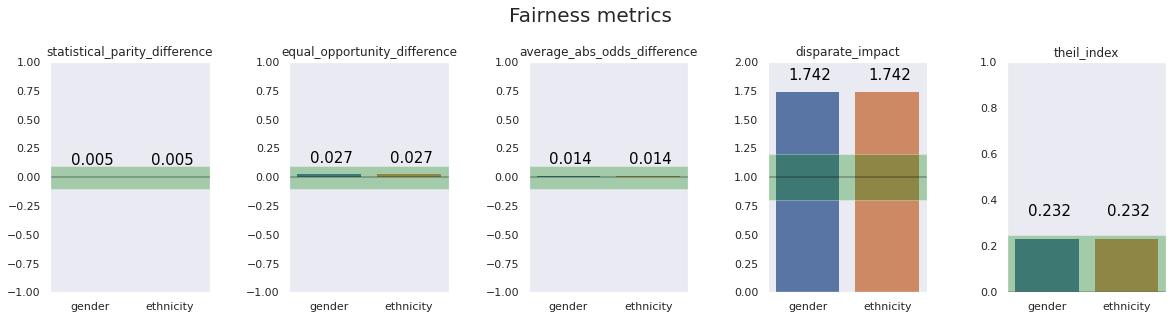

In [72]:
display(Markdown('### Bias metrics for the Outcome model'))
fair = get_fair_metrics_and_plot(data_orig_outcome_train, rf_orig_outcome) 

#data_orig_outcome_test

In [73]:
data_orig_test = data_orig_outcome_test
data_orig_train = data_orig_outcome_train
rf = rf_orig_outcome

probs = rf.predict_proba(data_orig_test.features)
preds = rf.predict(data_orig_test.features)
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf, fair, preds, probs, 'Origin')

How to fix it?

Reweighing

In [74]:
privileged_groups = [{'ethnicity': 3}]
unprivileged_groups = [{'ethnicity': 1}] 

t0 = time()

RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
# RW.fit(data_orig_train)
data_transf_train = RW.fit_transform(data_orig_train)

# Train and save the model
rf_transf = RandomForestClassifier().fit(data_transf_train.features, 
                     data_transf_train.labels.ravel(), 
                     sample_weight=data_transf_train.instance_weights)

data_transf_test = RW.transform(data_orig_test)
fair = get_fair_metrics_and_plot(data_orig_test, rf_transf, plot=False)
probs = rf_transf.predict_proba(data_orig_test.features)
preds = rf_transf.predict(data_orig_test.features)

algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_transf, fair, preds, probs, 'Reweighing')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 0.39s


In [75]:
new_transf_train = BinaryLabelDatasetMetric(data_transf_train, 
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % new_transf_train.mean_difference())



#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.000000


In [76]:
min_max_scaler = MaxAbsScaler()
data_orig_train.features = min_max_scaler.fit_transform(data_orig_train.features)
data_orig_test.features = min_max_scaler.transform(data_orig_test.features)
metric_scaled_train = BinaryLabelDatasetMetric(data_orig_train, 
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
display(Markdown("#### Scaled dataset - Verify that the scaling does not affect the group label statistics"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_scaled_train.mean_difference())
metric_scaled_test = BinaryLabelDatasetMetric(data_orig_test, 
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_scaled_test.mean_difference())

#### Scaled dataset - Verify that the scaling does not affect the group label statistics

Train set: Difference in mean outcomes between unprivileged and privileged groups = -0.031739
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.010659


In [77]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

sess = tf.Session()
plain_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='plain_classifier',
                          debias=False,
                          sess=sess)

Instructions for updating:
non-resource variables are not supported in the long term


In [78]:
plain_model.fit(data_orig_train)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
epoch 0; iter: 0; batch classifier loss: 0.665858
epoch 1; iter: 0; batch classifier loss: 0.568115
epoch 2; iter: 0; batch classifier loss: 0.515258
epoch 3; iter: 0; batch classifier loss: 0.575605
epoch 4; iter: 0; batch classifier loss: 0.493348
epoch 5; iter: 0; batch classifier loss: 0.512405
epoch 6; iter: 0; batch classifier loss: 0.529474
epoch 7; iter: 0; batch classifier loss: 0.452913
epoch 8; iter: 0; batch classifier loss: 0.455143
epoch 9; iter: 0; batch classifier loss: 0.543399
epoch 10; iter: 0; batch classifier loss: 0.463988
epoch 11; iter: 0; batch classifier loss: 0.531865
epoch 12; iter: 0; batch classifier loss: 0.480799
epoch 13; iter: 0; batch classifier loss: 0.481028
epoch 14; iter: 0; batch classifier loss: 0.491670
epoch 15; iter: 0; batch classifier loss: 0.494627
epoch 16; iter: 0; batch classifier loss: 0.383038
epoch 17; iter: 0; batch cla

In [79]:
# Apply the plain model to test data
dataset_nodebiasing_train = plain_model.predict(data_orig_train)
dataset_nodebiasing_test = plain_model.predict(data_orig_test)

In [80]:
# Metrics for the dataset from plain model (without debiasing)
display(Markdown("#### Plain model - without debiasing - dataset metrics"))
metric_dataset_nodebiasing_train = BinaryLabelDatasetMetric(dataset_nodebiasing_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_train.mean_difference())

metric_dataset_nodebiasing_test = BinaryLabelDatasetMetric(dataset_nodebiasing_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_test.mean_difference())

display(Markdown("#### Plain model - without debiasing - classification metrics"))
classified_metric_nodebiasing_test = ClassificationMetric(data_orig_test, 
                                                 dataset_nodebiasing_test,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
print("Test set: Classification accuracy = %f" % classified_metric_nodebiasing_test.accuracy())
TPR = classified_metric_nodebiasing_test.true_positive_rate()
TNR = classified_metric_nodebiasing_test.true_negative_rate()
bal_acc_nodebiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_nodebiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_nodebiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_nodebiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_nodebiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_nodebiasing_test.theil_index())

#### Plain model - without debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.000000
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.000000


#### Plain model - without debiasing - classification metrics

Test set: Classification accuracy = 0.793776
Test set: Balanced classification accuracy = 0.500000
Test set: Disparate impact = nan
Test set: Equal opportunity difference = 0.000000
Test set: Average odds difference = 0.000000
Test set: Theil_index = 0.230954



Apply in-processing algorithm based on adversarial learning

In [81]:
sess.close()
tf.reset_default_graph()
sess = tf.Session()

In [82]:
# Learn parameters with debias set to True
debiased_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='debiased_classifier',
                          debias=True,
                          sess=sess)

In [83]:
debiased_model.fit(data_orig_train)

epoch 0; iter: 0; batch classifier loss: 0.670085; batch adversarial loss: 0.455142
epoch 1; iter: 0; batch classifier loss: 0.508367; batch adversarial loss: 0.530296
epoch 2; iter: 0; batch classifier loss: 0.501530; batch adversarial loss: 0.562456
epoch 3; iter: 0; batch classifier loss: 0.463963; batch adversarial loss: 0.557228
epoch 4; iter: 0; batch classifier loss: 0.548249; batch adversarial loss: 0.467873
epoch 5; iter: 0; batch classifier loss: 0.594106; batch adversarial loss: 0.510940
epoch 6; iter: 0; batch classifier loss: 0.567635; batch adversarial loss: 0.397352
epoch 7; iter: 0; batch classifier loss: 0.524921; batch adversarial loss: 0.355669
epoch 8; iter: 0; batch classifier loss: 0.589146; batch adversarial loss: 0.351376
epoch 9; iter: 0; batch classifier loss: 0.601155; batch adversarial loss: 0.261750
epoch 10; iter: 0; batch classifier loss: 0.470236; batch adversarial loss: 0.292693
epoch 11; iter: 0; batch classifier loss: 0.580713; batch adversarial loss:

In [84]:
# Apply the plain model to test data
dataset_debiasing_train = debiased_model.predict(data_orig_train)
dataset_debiasing_test = debiased_model.predict(data_orig_test)

In [85]:
# Metrics for the dataset from plain model (without debiasing)
display(Markdown("#### Plain model - without debiasing - dataset metrics"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_train.mean_difference())
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_test.mean_difference())

# Metrics for the dataset from model with debiasing
display(Markdown("#### Model - with debiasing - dataset metrics"))
metric_dataset_debiasing_train = BinaryLabelDatasetMetric(dataset_debiasing_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_debiasing_train.mean_difference())

metric_dataset_debiasing_test = BinaryLabelDatasetMetric(dataset_debiasing_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_debiasing_test.mean_difference())



display(Markdown("#### Plain model - without debiasing - classification metrics"))
print("Test set: Classification accuracy = %f" % classified_metric_nodebiasing_test.accuracy())
TPR = classified_metric_nodebiasing_test.true_positive_rate()
TNR = classified_metric_nodebiasing_test.true_negative_rate()
bal_acc_nodebiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_nodebiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_nodebiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_nodebiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_nodebiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_nodebiasing_test.theil_index())



display(Markdown("#### Model - with debiasing - classification metrics"))
classified_metric_debiasing_test = ClassificationMetric(data_orig_test, 
                                                 dataset_debiasing_test,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
print("Test set: Classification accuracy = %f" % classified_metric_debiasing_test.accuracy())
TPR = classified_metric_debiasing_test.true_positive_rate()
TNR = classified_metric_debiasing_test.true_negative_rate()
bal_acc_debiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_debiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_debiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_debiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_debiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_debiasing_test.theil_index())

#### Plain model - without debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.000000
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.000000


#### Model - with debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.000000
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.000000


#### Plain model - without debiasing - classification metrics

Test set: Classification accuracy = 0.793776
Test set: Balanced classification accuracy = 0.500000
Test set: Disparate impact = nan
Test set: Equal opportunity difference = 0.000000
Test set: Average odds difference = 0.000000
Test set: Theil_index = 0.230954


#### Model - with debiasing - classification metrics

Test set: Classification accuracy = 0.732595
Test set: Balanced classification accuracy = 0.494591
Test set: Disparate impact = nan
Test set: Equal opportunity difference = 0.000000
Test set: Average odds difference = 0.000000
Test set: Theil_index = 0.238217


post-processing

In [86]:
# Get the dataset and split into train and test
dataset_post_train, dataset_post_vt = data_orig_outcome.split([0.7], shuffle=True)
dataset_post_valid, dataset_post_test = dataset_post_vt.split([0.5], shuffle=True)

In [87]:
# Logistic regression classifier and predictions
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_post_train.features)
y_train = dataset_post_train.labels.ravel()

rf_transf.fit(X_train, y_train)
y_train_pred = rf_transf.predict(X_train)

# positive class index
pos_ind = np.where(rf_transf.classes_ == dataset_post_train.favorable_label)[0][0]

dataset_post_train_pred = dataset_post_train.copy(deepcopy=True)
dataset_post_train_pred.labels = y_train_pred

In [88]:
dataset_post_valid_pred = dataset_post_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_post_valid_pred.features)
y_valid = dataset_post_valid_pred.labels
dataset_post_valid_pred.scores = rf_transf.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_post_test_pred = dataset_post_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_post_test_pred.features)
y_test = dataset_post_test_pred.labels
dataset_post_test_pred.scores = rf_transf.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

Find the optimal parameters from the validation set

In [89]:
num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_post_valid_pred.scores > class_thresh
    dataset_post_valid_pred.labels[fav_inds] = dataset_post_valid_pred.favorable_label
    dataset_post_valid_pred.labels[~fav_inds] = dataset_post_valid_pred.unfavorable_label
    
    classified_metric_post_valid = ClassificationMetric(dataset_post_valid,
                                             dataset_post_valid_pred, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
    ba_arr[idx] = 0.5*(classified_metric_post_valid.true_positive_rate()\
                       +classified_metric_post_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)

Best balanced accuracy (no fairness constraints) = 0.5571
Optimal classification threshold (no fairness constraints) = 0.1882


Estimate optimal parameters for the ROC method

In [90]:
# Metric used (should be one of allowed_metrics)
metric_name = "Statistical parity difference"

# Upper and lower bound on the fairness metric used
metric_ub = 0.05
metric_lb = -0.05

# Verify metric name
allowed_metrics = ["Statistical parity difference",
                   "Average odds difference",
                   "Equal opportunity difference"]
if metric_name not in allowed_metrics:
    raise ValueError("Metric name should be one of allowed metrics")

ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups, 
                                 privileged_groups=privileged_groups, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name=metric_name,
                                  metric_ub=metric_ub, metric_lb=metric_lb)
ROC = ROC.fit(dataset_post_valid, dataset_post_valid_pred)

In [91]:
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Optimal classification threshold (with fairness constraints) = 0.1684
Optimal ROC margin = 0.0000


Predictions from Validation Set

In [92]:
# Metrics for the test set
fav_inds = dataset_post_valid_pred.scores > best_class_thresh
dataset_post_valid_pred.labels[fav_inds] = dataset_post_valid_pred.favorable_label
dataset_post_valid_pred.labels[~fav_inds] = dataset_post_valid_pred.unfavorable_label

display(Markdown("#### Validation set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_valid_bef = compute_metrics(dataset_post_valid, dataset_post_valid_pred, 
                unprivileged_groups, privileged_groups)

#### Validation set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.5571
Statistical parity difference = -0.3005
Disparate impact = 0.6018
Average odds difference = -0.3396
Equal opportunity difference = -0.4153
Theil index = 0.1322


In [93]:
# Transform the validation set
dataset_transf_valid_pred = ROC.predict(dataset_post_valid_pred)

display(Markdown("#### Validation set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_valid_aft = compute_metrics(dataset_post_valid, dataset_transf_valid_pred, 
                unprivileged_groups, privileged_groups)

#### Validation set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.5529
Statistical parity difference = -0.0224
Disparate impact = 0.9730
Average odds difference = -0.0440
Equal opportunity difference = -0.0847
Theil index = 0.0952


In [94]:

# Testing: Check if the metric optimized has not become worse
assert np.abs(metric_valid_aft[metric_name]) <= np.abs(metric_valid_bef[metric_name])

Predictions from Test Set

In [95]:
# Metrics for the test set
fav_inds = dataset_post_test_pred.scores > best_class_thresh
dataset_post_test_pred.labels[fav_inds] = dataset_post_test_pred.favorable_label
dataset_post_test_pred.labels[~fav_inds] = dataset_post_test_pred.unfavorable_label

display(Markdown("#### Test set"))
display(Markdown("##### Raw predictions - No fairness constraints, only maximizing balanced accuracy"))

metric_test_bef = compute_metrics(dataset_post_test, dataset_post_test_pred, 
                unprivileged_groups, privileged_groups)

#### Test set

##### Raw predictions - No fairness constraints, only maximizing balanced accuracy

Balanced accuracy = 0.5433
Statistical parity difference = -0.2653
Disparate impact = 0.6534
Average odds difference = -0.3080
Equal opportunity difference = -0.3884
Theil index = 0.1183


In [96]:
# Metrics for the transformed test set
dataset_transf_test_pred = ROC.predict(dataset_post_test_pred)

display(Markdown("#### Test set"))
display(Markdown("##### Transformed predictions - With fairness constraints"))
metric_test_aft = compute_metrics(dataset_post_test, dataset_transf_test_pred, 
                unprivileged_groups, privileged_groups)

#### Test set

##### Transformed predictions - With fairness constraints

Balanced accuracy = 0.5602
Statistical parity difference = -0.0138
Disparate impact = 0.9836
Average odds difference = -0.0075
Equal opportunity difference = 0.0014
Theil index = 0.0784
